# Feature Normalisation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Downloads/wine_data.csv',usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

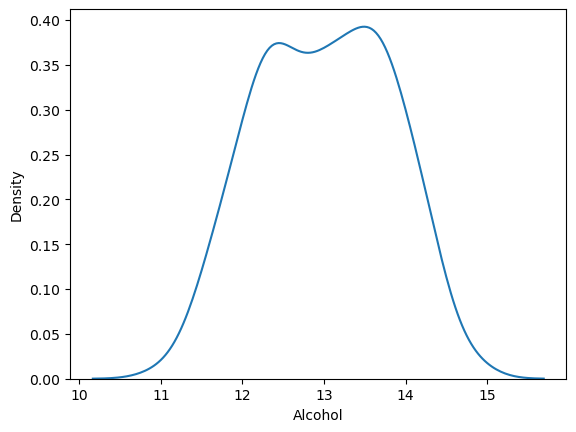

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

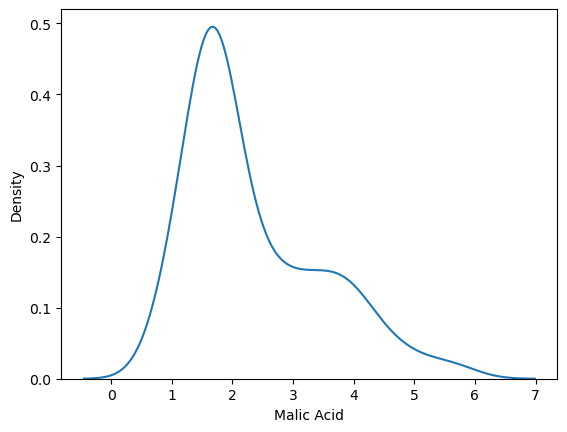

In [5]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

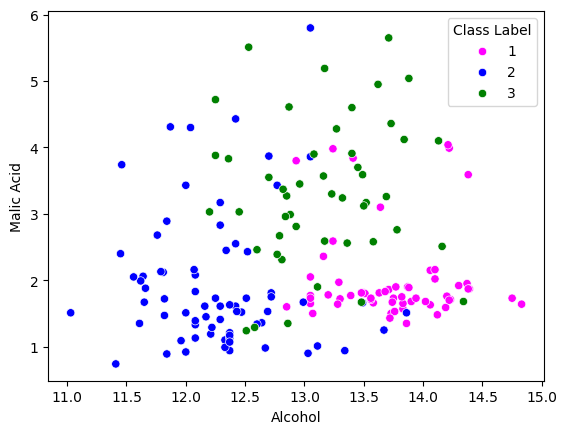

In [6]:
import seaborn as sns
color_dict={1:'magenta',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class Label'],palette=color_dict)

***Train-Test Split***

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [10]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


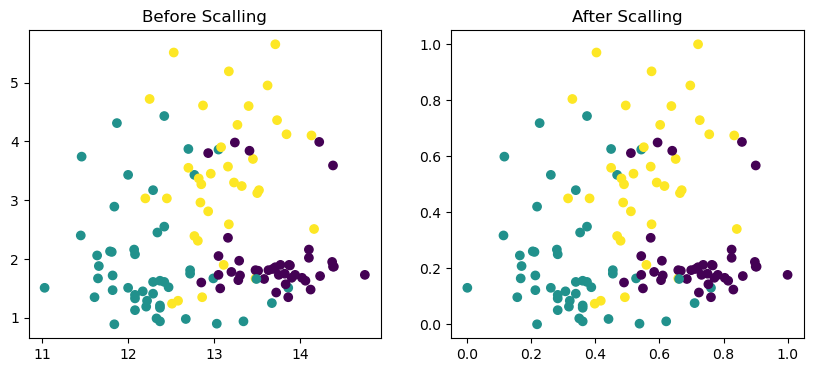

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scalling")
plt.show()

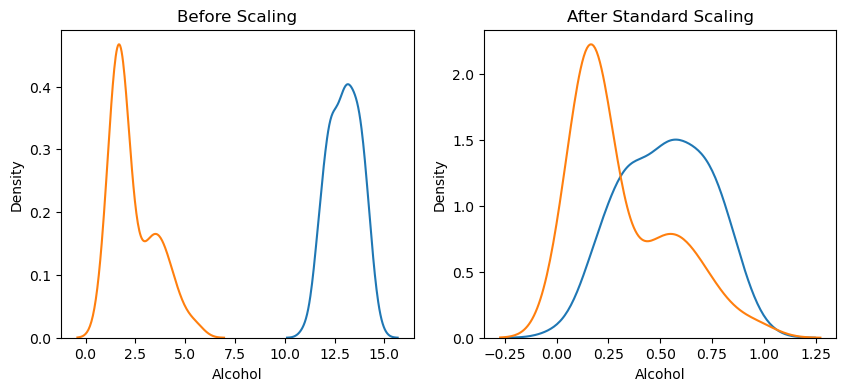

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic Acid'],ax=ax1)
# After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
plt.show()

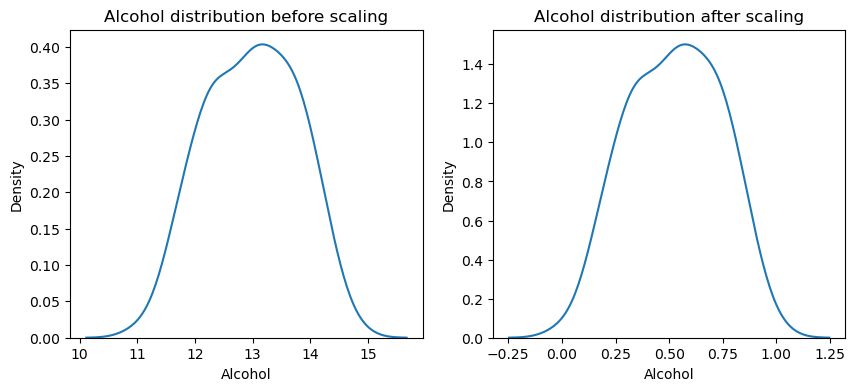

In [65]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
ax1.set_title("Alcohol distribution before scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
ax2.set_title("Alcohol distribution after scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

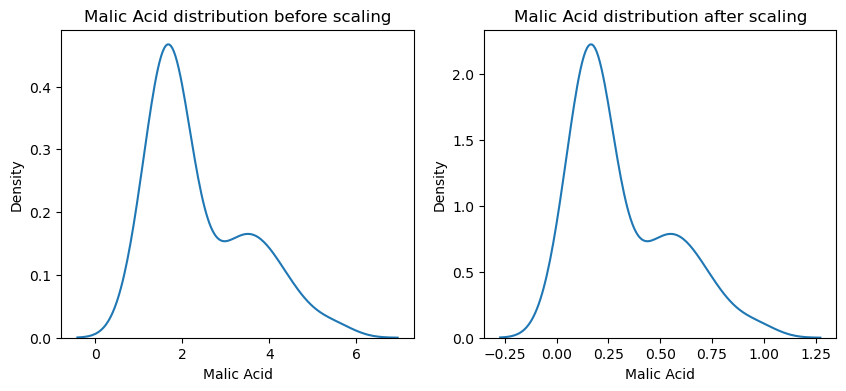

In [67]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
ax1.set_title("Malic Acid distribution before scaling")
sns.kdeplot(x_train['Malic Acid'],ax=ax1)
ax2.set_title("Malic Acid distribution after scaling")
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
plt.show()